# 1.Data Preprocessing

<div class="alert alert-block alert-info">
<b>Load dataset and import librairies
</div>

### Import NumPy for numerical calculation, Pandas for handling data and visualization with Seaborn and Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize']=(12,6)
sns.set
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Import the dataset

In [91]:
parkinsons_data=pd.read_csv('parkinsons.csv')

In [92]:
# Using shape function, we can observe the dimensions of the data
parkinsons_data.shape

(195, 24)

<font color='green'>There are 24 columns and 195 observations</font>

In [93]:
# We can observe the dataset using the head()function, which returns the first five records from the dataset
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<font color='green'>This project is a classification problem, from which we predict the binary variable "status" which can either be ill with Parkinson disease or not </font>

In [94]:
# The info() method shows some of the characteristics of the data 
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

<font color='green'>We can see that we have mainly float or numeric data except for "name" and "status" columns</font>

<div class="alert alert-block alert-info">
<b>Statistical insights
</div>

In [95]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis (EDA)
</div>

#### Let's build subplots of the features with boxplot or whisker plot to see the minimum, 1srt quantile, median and max.
#### Each time the feature is related to the status (0 or 1 for healthy or Parkinson disease)

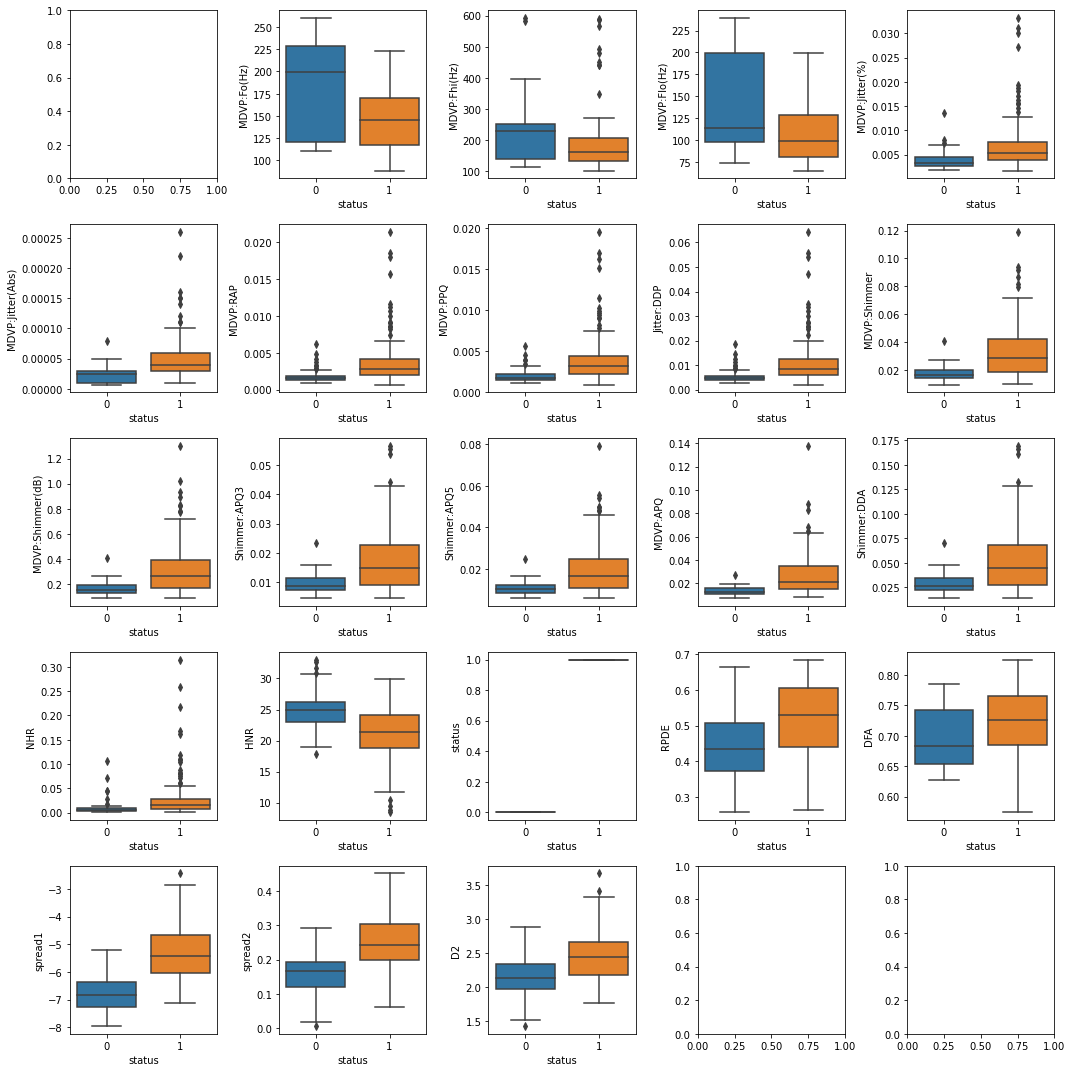

In [96]:
fig, axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(parkinsons_data.columns)-1):
    sns.boxplot(x='status', y=parkinsons_data.iloc[:,i], data=parkinsons_data, orient='v', ax=axes[i])
plt.tight_layout()
plt.show()

<font color='green'>Thanks to these subplots we can easily see the outliers, the points that lie outside the whiskers.</font>

<function matplotlib.pyplot.show(close=None, block=None)>

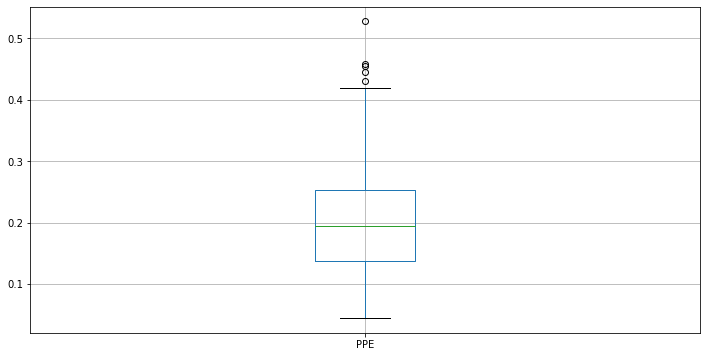

In [97]:
# Let's have a closer look to the "PPE" variable
parkinsons_data.boxplot(column=['PPE'])
plt.show
# There are some outliers between 0.4 and 0.5 and beyond 0.5

<div class="alert alert-block alert-info">
<b></b> Data Cleaning

### Removing duplicates and finding missing values are important, otherwise our models can lead us to incorrect conclusions

In [98]:
duplicate_Values=parkinsons_data.duplicated()
print(duplicate_Values.sum())
parkinsons_data[duplicate_Values]

0


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


<font color='green'>There are no duplicate variables</font>

In [99]:
print(parkinsons_data.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


<font color='green'>Luckily, this dataset does not contain any missing values</font>

<div class="alert alert-block alert-info">
<b>Correlation Analysis
</div>

In [100]:
corr= parkinsons_data.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<font color='green'>We don't have a clear visualization</font>

### We create a heatmap using Seaborn

<AxesSubplot:>

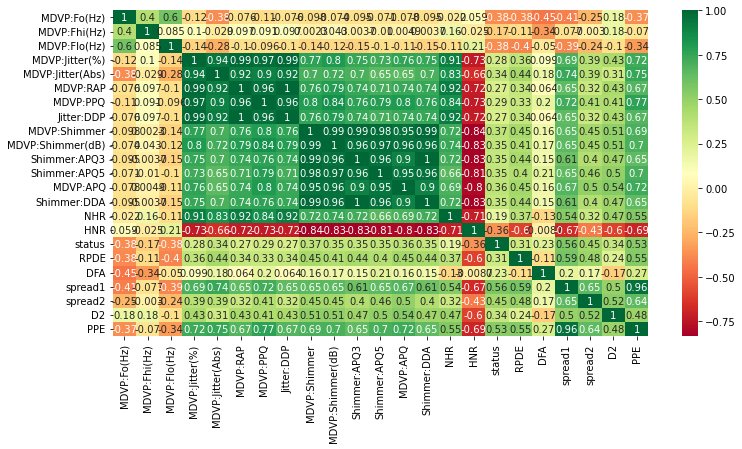

In [101]:
sns.heatmap(parkinsons_data.corr(),annot=True,cmap='RdYlGn')

<font color='green'>As it shown, it is not hard to find following pairs of highly correlated features:<br> Spread1 and PPE = 0,96</font>

### For a better visualization let's see below

<AxesSubplot:>

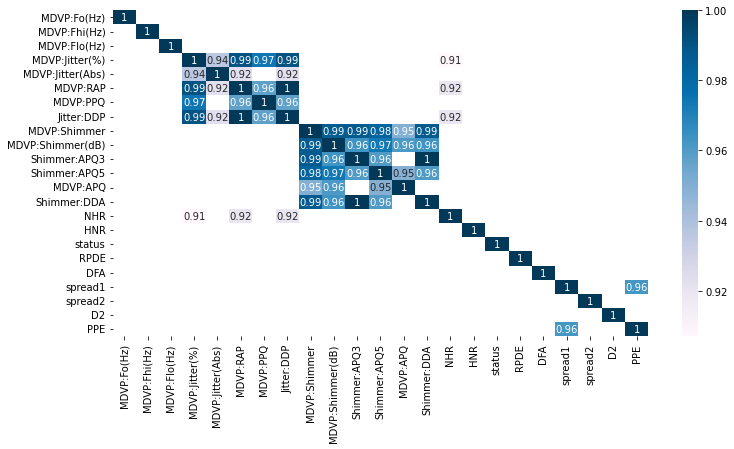

In [129]:
sns.heatmap(corr[(corr>0.9)],annot=True,cmap='PuBu')

<font color='green'>We can also check the correlation between "spread1" and "PPE" variables thanks to "regplot" which plots the scartterplot plus the fitted regression line for the data.</font>

<AxesSubplot:xlabel='spread1', ylabel='PPE'>

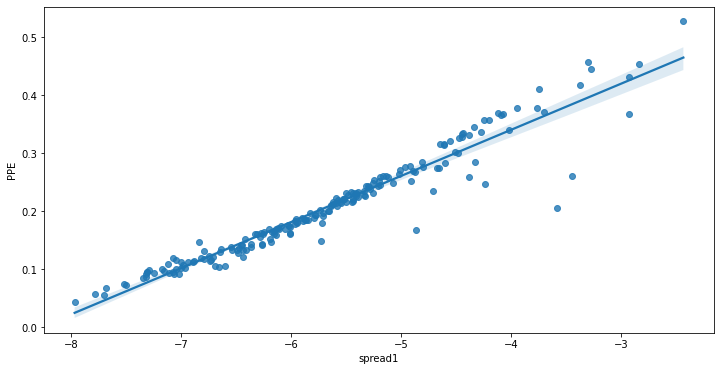

In [130]:
sns.regplot(x='spread1', y='PPE', data=parkinsons_data)

### Let's go deeper with the P-value to know the significance of the correlation estimate when p-value is <br> < 0.001 leads to strong evidence  <br> < 0.05 leads to moderate evidence <br> < 0.1 leads to weak evidence <br> > 0.1 leads to no evidence

In [131]:
from scipy import stats

In [132]:
pearson_coef, p_value = stats.pearsonr(parkinsons_data['spread1'], parkinsons_data['PPE'])
print ("The Pearson Correlation coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation coefficient is 0.962435293257281  with a P-value of P = 3.1338007401494733e-111


<font color='green'>The linear relationship is strong between "spread1" and "PPE"(app. 0.96) and the correlation is statistically very significant</font>

# 2.Modeling

<div class="alert alert-block alert-info">
<b>Let's explore some models, tune it to optimize its performance with the better predictability rate
</div>

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from os import system
from sklearn import metrics

In [134]:
# As we have seen previously, we can remove the non-numeric columns "name" and "status"
X = parkinsons_data.drop(['status', 'name'], axis = 1)
Y = parkinsons_data.status

### Decision Tree Model

In [135]:
# Splitting Data into 70% Training data and 30% Testing Data
X_train, X_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=42)
print(len(X_train)),print(len(X_test))

136
59


(None, None)

In [136]:
# Applying decision tree model
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5)
decision_tree.fit(X_train, y_train)
decision_tree.score(X_test , y_test) 

0.847457627118644

In [137]:
y_pred = decision_tree.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[11,  4],
       [ 5, 39]])

In [138]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Decision Tree: {}'.format(count_misclassified))

Misclassified samples in Decision Tree: 9


<font color='green'>We've got 9 outliers samples</font>

### Random Forest

In [139]:
randomforest = RandomForestClassifier(n_estimators = 50)
randomforest = randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
randomforest.score(X_test , y_test)

0.9322033898305084

In [140]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

Misclassified samples in Random Forest: 4


<font color='green'>We've got 4 outliers samples</font>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


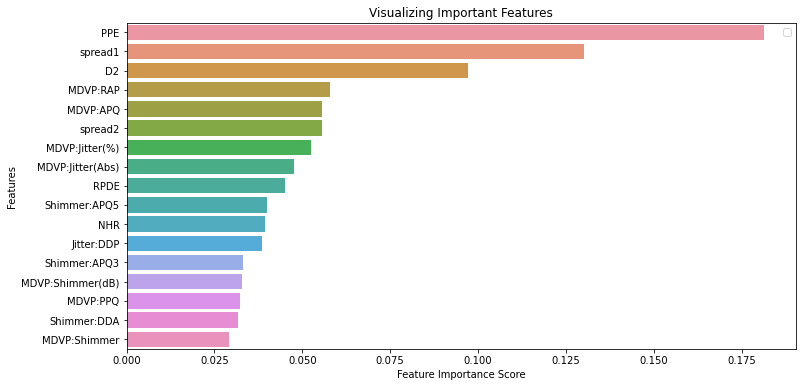

In [141]:
feature_imp = pd.Series(randomforest.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### KNN

In [142]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.8983050847457628

In [143]:
y_pred = knn.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in KNN: {}'.format(count_misclassified))

Misclassified samples in KNN: 6


<font color='green'>We've got 6 outliers samples</font>

### ADABoost

In [144]:
adb = AdaBoostClassifier( n_estimators= 50)
adb = adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)
adb.score(X_test , y_test)

0.847457627118644

In [145]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Ada Boosting: {}'.format(count_misclassified))

Misclassified samples in Ada Boosting: 9


<font color='green'>We've got 9 outliers samples</font>

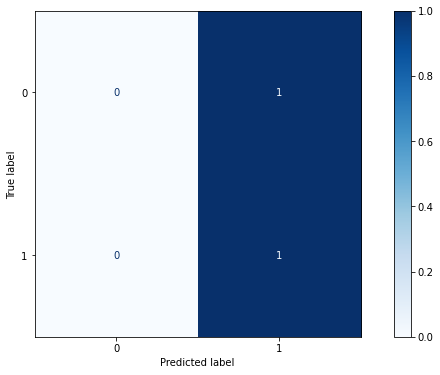

In [146]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
clf_dummy= DummyClassifier(random_state=42)
clf_dummy.fit(X_train, y_train)
y_pred = clf_dummy.predict(X_test)
plot_confusion_matrix(estimator=clf_dummy, X=X_test, y_true=y_test, normalize='true', cmap='Blues')

In [147]:
y_train.value_counts(normalize=True)

1    0.757353
0    0.242647
Name: status, dtype: float64

<font color='green'>We have more people with Parkinson disease than people with not Parkinson <br> So the dummy classifier is predicting more people with the disease</font>

# Performance evaluation

<div class="alert alert-block alert-info">
<b>With the confusion matrix we can have some metrics such as the accuracy, F1 score and the precision
</div>

In [148]:
print(accuracy_score(y_test, y_pred))

0.7457627118644068


In [149]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[ 0 15]
 [ 0 44]]


In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.75      1.00      0.85        44

    accuracy                           0.75        59
   macro avg       0.37      0.50      0.43        59
weighted avg       0.56      0.75      0.64        59

